In [1]:
import requests
import json, os
import urllib.request
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
import shapely
import pickle
import random
import numpy as np
import gmaps, os
import tensorflow as tf
dataDir = "/home/nirvan/Desktop/github/GeoguessrAI/infoExtraction/data"

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import decode_predictions

In [3]:
restnet = ResNet50(include_top=True, weights='imagenet', input_shape=(224,224,3))
restnetF = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))

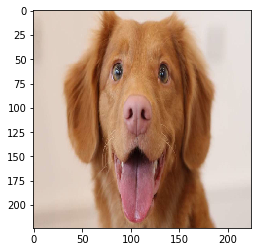

In [4]:
# image = load_img(dataDir + '/0/42.775957,-124.0667758/0_2009-07.jpg', target_size=(224, 224))
image = load_img('dog.jpg', target_size=(224, 224))
plt.imshow(np.array(image))
plt.show()

In [5]:
img = img_to_array(image)
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
img = preprocess_input(img)

In [6]:
decode_predictions(restnet.predict(img))

[[('n02099601', 'golden_retriever', 0.7531765),
  ('n02100583', 'vizsla', 0.061531805),
  ('n02099267', 'flat-coated_retriever', 0.040488884),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.034401458),
  ('n02102480', 'Sussex_spaniel', 0.018299002)]]

In [7]:
restnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
restnetF.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [10]:
restnetT = tf.keras.Model(inputs=restnet.input, outputs=restnet.get_layer('conv5_block3_out').output)
restnetT.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [15]:
k = restnet.get_layer('conv5_block3_out')

In [16]:
k.input

<tf.Tensor 'conv5_block3_add/Identity:0' shape=(None, 7, 7, 2048) dtype=float32>

In [17]:
restnet.input

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [13]:
restnetF.predict(img) == restnetT.predict(img)

array([[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  T

In [29]:
model_finetuned = tf.keras.models.Sequential()
model_finetuned.add(restnetF)
model_finetuned.add(restnet.get_layer('avg_pool'))
model_finetuned.add(restnet.get_layer('probs'))

In [34]:
decode_predictions(model_finetuned.predict(img))

[[('n02099601', 'golden_retriever', 0.7531765),
  ('n02100583', 'vizsla', 0.061531805),
  ('n02099267', 'flat-coated_retriever', 0.040488884),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.034401458),
  ('n02102480', 'Sussex_spaniel', 0.018299002)]]

In [22]:
restnetT

In [ ]:
gPoly = []
sLoc = []
sHtext = []
restrict = list(gdsLoc.keys())
restrict = [79,111,29]
for k,v in gdsLoc.items():
    if k in restrict:
        gPoly.append(gmaps.Polygon(
                        list(usaPolyGrid[k]),
                        stroke_color='red',
                        fill_color='blue'
                        ))
        sLoc += v
        sHtext += [str(i) for i in v]
fig = gmaps.figure(center=(39.50,-98.35), zoom_level=4, map_type='TERRAIN')
fig.add_layer(gmaps.drawing_layer(features=gPoly))
fig.add_layer(gmaps.symbol_layer(sLoc,info_box_content = sHtext, scale = 2))
fig

# Machine learning

In [11]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
# import keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
# output = restnet.layers[-1].output
# output = keras.layers.Flatten()(output)
# restnet = Model(restnet.input, output=output)
# for layer in restnet.layers:
#     layer.trainable = False
# restnet.summary()

NameError: name 'IMG_HEIGHT' is not defined

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model_finetuned = Sequential()
model_finetuned.add(restnet)
model_finetuned.add(Dense(512, activation='relu', input_dim=input_shape))
model_finetuned.add(Dropout(0.3))
model_finetuned.add(Dense(512, activation='relu'))
model_finetuned.add(Dropout(0.3))
model_finetuned.add(Dense(1, activation='sigmoid'))
model_finetuned.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
model_finetuned.summary()

In [ ]:
flat1 = Flatten()(model.outputs)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)

In [ ]:
model.get_layer('block1_conv1').trainable = False
model.get_layer('block1_conv2').trainable = False
model.get_layer('block2_conv1').trainable = False
model.get_layer('block2_conv2').trainable = False

In [ ]:
import keras
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (150, 150, 3), classes = 10)

# Preprocessing the input 
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

# Extracting features
train_features = vgg19.predict(np.array(X_train), batch_size=256, verbose=1)
test_features = vgg19.predict(np.array(X_test), batch_size=256, verbose=1)
val_features = vgg19.predict(np.array(X_val), batch_size=256, verbose=1)

# Flatten extracted features
train_features = np.reshape(train_features, (48000, 4*4*512))
test_features = np.reshape(test_features, (10000, 4*4*512))
val_features = np.reshape(val_features, (12000, 4*4*512))

# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# first_image = mnist.test.images[0]
# first_image = np.array(first_image, dtype='float')
# pixels = first_image.reshape((28, 28))
plt.imshow(x_train[0])
plt.show()